<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.976 · Anàlisi de grafs i xarxes socials</p>
<p style="margin: 0; text-align:right;">20231 - Màster universitari en Ciències de dades (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informática, Multimedia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nom i cognoms:</strong> Joaquim Quadrada Jané
</div>

# PEC 1: Anàlisi de xarxes

En aquesta pràctica revisarem i aplicarem els coneixements apresos en el mòdul 1.

Les competències que es treballaran en aquesta activitat són les següents:

1. Coneixer com es descriuen les xarxes emprant els models de grafos.
2. Coneixer els principals mètodes per l'extracció d'informació i emmagatzematge en format de grafo.
3. Saber quines són les principals característiques de les xarxes reals.
4. Entendre les mètriques bàsiques aplicables a grafos i xarxes.
5. Coneixer els principals mètodes per la visualització de xarxes.
6. Comprendre els principals models de generació de dades sintètiques.

<u>Consideracions generals</u>:

- Aquesta prova d'avaluació s'ha de resoldre usant la llibreria NetworkX i altres llibreries importades en l'enunciat. L'ús de qualsevol altre llibreria **ha de justificar-se** en la mateixa activitat.
- Aquesta PEC s'ha de realitzar de forma **estrictament individual**. Qualsevol indici de còpia serà penalitzat amb un suspens (D) per a totes les parts implicades i la possible avaluació negativa de l'assignatura de forma íntegra.
- És necessari que l'estudiant indiqui **totes les fonts** que ha utilitzat per a la realització de la PEC. De no ser així, es considerarà que l'estudiant ha comès plagi, sent penalitzat amb un suspens (D) i la possible avaluació negativa de l'assignatura de forma íntegra.

<u>Format de l'entrega</u>:

- Alguns exercicis poden suposar diversos minuts d'execució, per la qual cosa l'entrega s'ha de fer en **format notebook i en format html**, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a HTML des del menú File $\to$ Download as $\to$ HTML.
- Existeix un tipus de cel·la especial per albergar text. Aquest tipus de cel·la us serà molt útil per respondre a les diferents preguntes teòriques plantejades al llarg de l'activitat. Per canviar el tipus de cel·la a aquest tipus, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

## 1. Càrrega de llibreries

A la següent cel·la, heu de carregar totes les llibreries neceessàries per l'execució de l'activitat. S'ha de justificar l'ús de llibreries addicionals. 

In [1]:
# Libreries bàsiques
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Llibreries addicionals (justificar l'ús)

%matplotlib inline

# importem la llibreria random necessària més endevant per fer el plot de l'arbre
import random

Las versions de llibreries que es recomanen per aquesta activitat son les següents:  
- NetworkX ver. 2.8.4
- Pandas ver. 1.4.4
- Numpy ver. 1.23.5

In [2]:
# Comprovar les versions
print("NetworkX ver. {}".format(nx.__version__))
print("Pandas ver. {}".format(pd.__version__))
print("Numpy ver. {}".format(np.__version__))

NetworkX ver. 2.8.4
Pandas ver. 1.5.2
Numpy ver. 1.23.5


## 2. Càrrega del conjunt de dades

En aquesta activitat treballarem amb un conjunt simplificat de dades pertanyent a la xarxa d'activitat neuronal del cervell d'un ratolí. De fet, es tracta del primer mapatge sistemàtic i detallat en la connectivitat cerebral d'un mamífer. https://www.nature.com/articles/nature13186

Dins de la carpeta data s'adjunta un fitxer amb tots els enllaços existents entre les diferents comunitats neuronals del cervell d'un ratolí.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 1: Importació de les dades, creació del graf i visualització </strong> (1 punt)
</div>

Fent servir la llista d'adjacència proporcionada, construïu la xarxa de connectivitat cerebral del ratolí, considerant que aquesta es **simètrica** (no dirigia) i **ponderada** (amb pesos). Al fitxer proporcionat, alguns enllaços es repeteixen varies vegades. S'utilitzarà aquesta informació per obtenir el pes de l'enllaç: si un enllaç 0-1 apareix 5 cops al fitxer, es considera que el seu pes es 5. Mostreu les següents propietats: 

* Número de nodes
* Número d'enllaços 
* Comprovar que es tracta d'un graf ponderat i no dirigit
* Pes mitjà dels enllaços
* Dibuixar el graf de forma adequada 


In [3]:
df = pd.read_csv("data/mouse_ponderado.csv",sep=" ")
df

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
577344,1111,1114
577345,1111,1114
577346,1111,1114
577347,1111,1114


In [4]:
# Inicialitzem el graf G
G = nx.Graph()

# Iterem per les files de df i afegim les arestes amb pesos
for _, row in df.iterrows():
    node1, node2 = row['0'], row['1']
    # Mirem si l'aresta existeix
    if G.has_edge(node1, node2):
        # Si l'aresta existeix, incrementem el pes en 1
        G[node1][node2]['weight'] += 1
    else:
        # Si l'aresta no existeix, la creem amb pes 1
        G.add_edge(node1, node2, weight=1)

In [5]:
# Comprovem si el graf és ponderat i no dirigit
is_weighted = all('weight' in data for u, v, data in G.edges(data=True))
is_directed = nx.is_directed(G)

# Calculem el pes mitjà dels enllaços
total_weight = sum(data['weight'] for _, _, data in G.edges(data=True))

# Número d'enllaços
total_edges = G.number_of_edges()

# Pes mitjà dels enllaços
average_weight = total_weight / total_edges if total_edges > 0 else 0

<Figure size 1000x800 with 0 Axes>

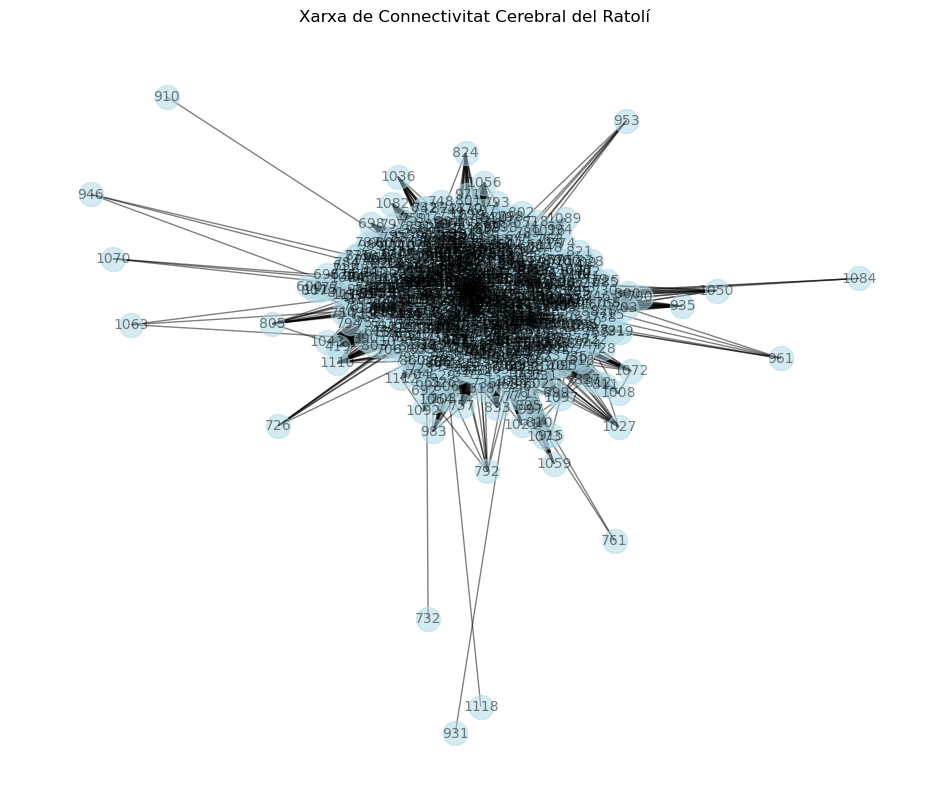

In [6]:
# Dibuixar el graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 10))
plt.axis('off')  # Disable the axis
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10, alpha=0.5)
plt.title('Xarxa de Connectivitat Cerebral del Ratolí')
plt.show()

In [7]:
# Mostrar les propietats
print("Número de nodes:", G.number_of_nodes())
print("Número d'enllaços:", G.number_of_edges())
print("És un graf ponderat?", is_weighted)
print("És un graf no dirigit?", not is_directed)
print("Pes mitjà dels enllaços:", average_weight)

Número de nodes: 1076
Número d'enllaços: 90811
És un graf ponderat? True
És un graf no dirigit? True
Pes mitjà dels enllaços: 6.357698957174792


## 3. Anàlisi del graf

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 2: Anàlisi bàsic</strong> (1.5 punts)
</div>

Descriu el graft fent servir algunes mètriques addicionals: 

- Grau mitjà 
- Densitat. Es un graf dens? 
- Connectivitat. Es un graf connex? 
- Troba la seqüència de graus de la xarxa, tenint en compte el pes dels enllaços, i representala amb un histograma  a l'escala adequada. 
- Visualitza la matriu d'adjacencia d'una forma similar a la Figura 3 de https://www.nature.com/articles/nature13186
- Construeix una funció que retorni el graf complementari d'un graf G. Sense utilitzar funcions implementades en llibreries. Fent servir la funció anterior, genera el graf complementari i suma'l a l'original per obtenir un graf H completament connex. 


In [8]:
# Càlcul del grau mitjà
average_degree = sum(dict(G.degree()).values()) / len(G.nodes())
print("Grau mitjà:", average_degree)

Grau mitjà: 168.79368029739777


In [9]:
# Càlcul de la densitat
density = nx.density(G)
print("Densitat:", density)

Densitat: 0.15701737702083512


La densitat del graf és aproximadament 0.157, el que indica que el graf té una densitat relativament baixa. Si la densitat fos 1, significaria que cada node està connectat amb tots els altres nodes, formant un graf complet. Per tant, un valor de densitat de 0.157 indica que només aproximadament el 15.7% de les connexions possibles estan presents en el graf. En aquest context, no es consideraria un graf dens.

In [10]:
# Càlcul de la connectivitat
is_connected = nx.is_connected(G)
print("És un graf connex?", is_connected)

És un graf connex? True


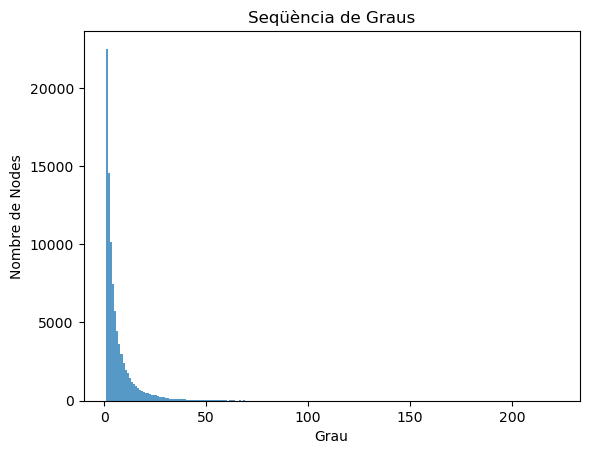

Màxim Grau 222


In [11]:
# Càlcul de la seqüència de graus i representació en histograma
degree_sequence = [d['weight'] for _, _, d in G.edges(data=True)]
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1, 1), alpha=0.75)
plt.xlabel('Grau')
plt.ylabel('Nombre de Nodes')
plt.title('Seqüència de Graus')
plt.show()
print("Màxim Grau",max(degree_sequence))

In [12]:
# Crear matriu d'adjacència en forma de mapa de colors
adj_matrix = nx.to_numpy_matrix(G)
adj_matrix

matrix([[ 0., 35., 22., ...,  0.,  0.,  0.],
        [35.,  0., 27., ...,  0.,  0.,  0.],
        [22., 27.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

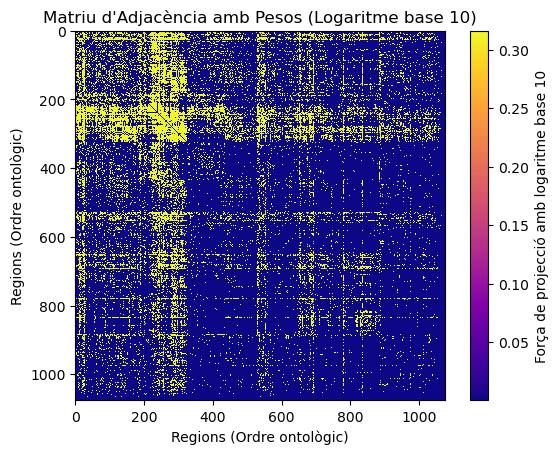

In [13]:
# Establim els llindars de color basats en la descripció proporcionada en l'article
min_val = 10**(-3.5)
max_val = 10**(-0.5)

# Creem un mapa de colors amb transició de blau a groc
cmap = plt.cm.get_cmap('plasma')

# Dibuixem la matriu d'adjacència amb el mapa de colors i el rang de colors especificat
plt.imshow(adj_matrix, cmap=cmap, interpolation='none', vmin=min_val, vmax=max_val)

# Afegim una barra de colors amb etiquetes adequades
cbar = plt.colorbar()
cbar.set_label('Força de projecció amb logaritme base 10')

# Afegim el títol i les etiquetes
plt.title('Matriu d\'Adjacència amb Pesos (Logaritme base 10)')
plt.xlabel('Regions (Ordre ontològic)')
plt.ylabel('Regions (Ordre ontològic)')

# Mostrem la representació gràfica
plt.show()

In [14]:
# funció per crear el graf complementari
def complementary_graph(G):
    G_complement = nx.Graph()
    nodes = G.nodes()
    # per cada node
    for node1 in nodes:
        # recorrem tots els nodes
        for node2 in nodes:
            # si el node1 no és el node2 i no hi ha aresta entre node1 i node2
            if node1 != node2 and not G.has_edge(node1, node2):
                # inserim l'aresta en el node complementari
                G_complement.add_edge(node1, node2)
    return G_complement

In [15]:
# creem el graf complementari de G
G_complement = complementary_graph(G)

# Per obtenir un graf completament connex, sumarem el graf complementari a l'original.
H = nx.compose(G, G_complement)

In [16]:
# funció que comprova si un graf és completament connex
def is_completely_connected(graph):
    # número de nodes en el graf
    num_nodes = len(graph.nodes)
    # Número d'arestes en un graf complet
    expected_num_edges = num_nodes * (num_nodes - 1) / 2 
    # número d'arestes en el graf
    actual_num_edges = len(graph.edges)
    # si el número d'arestes en el graf és el número d'arestes en un graf complet retoirna True
    return actual_num_edges == expected_num_edges

# Utilitzem la funció per comprovar si el graf H és completament connex
print("És el graf H completament connex?", is_completely_connected(H))

És el graf H completament connex? True


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3: Anàlisi complementari</strong> (1.5 punts)
</div>

* Calcula la distància mitjana entre tots els parells de nodes de la xarxa.
* Basant-te en la teoria, elimina 5 nodes de la xarxa de manera selectiva de forma que s'augmenti la distància mitjana entre parells de nodes el màxim possible. Explica l'elecció realitzada.
* Calcula la nova distància mitjana entre tots els parells de nodes de la xarxa. Si algun node ha quedat no connectat, únicament realitza aquests càlculs sobre la component gegant.
* Basant-te en els resultats obtinguts, fes algun comentari sobre la xarxa.
* Troba i representa algun exemple de 1-clique, 2-clique i 3-clique.

In [17]:
# Calculem la distància mitjana entre tots els parells de nodes de la xarxa
average_shortest_path_length = nx.average_shortest_path_length(G)
print("Distància mitjana entre tots els parells de nodes:", average_shortest_path_length)

Distància mitjana entre tots els parells de nodes: 1.8612656695772456


La distància mitjana entre nodes en un graf està relacionada amb la connexió i estructura de la xarxa. Eliminant nodes clau, podem augmentar la distància mitjana entre parells de nodes.

Calculem la betweenness centrality per a cada node. La betweenness centrality mesura què tan central és un node en les rutes més curtes entre altres nodes. Nodes amb alta betweenness centrality estan en molts camins més curts i, per tant, són crucials per a la connexió en la xarxa. Eliminant els nodes amb major betweenness centrality augmentarem la distància mitjana entre nodes.

In [18]:
# Càlcul de la Betweenness, Closeness i Eigenvector Centralities
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G, tol=1e-03)

# array de centralitats
centralities = ['Betweenness Centrality','Closeness Centrality','Eogenvector centrality']

# Ordenem els nodes amb la combinació més alta de centrality scores per tipus de centralitat
nodes_to_remove = ([sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5],
                    sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5],
                    sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]])

# inicialitzem llista de resultats
results = []

# iterem per cadena de nodes a treure
for nodes in nodes_to_remove:
    
    # fem una còpia del graf
    G_removed = G.copy()
    
    # per cada node a treure, el treiem
    for node in nodes:
        G_removed.remove_node(node)
    
    # mirem si és connex. Si ho és, calculem la nova distància mitjana entre nodes.
    # Si no ho és mirem la nova distància mitjana del component gegant.
    if nx.is_connected(G_removed):
        new_average_shortest_path_length = nx.average_shortest_path_length(G_removed)
    else:
        # Si el graf no és connectat, calculem la nova distància mitjana
        # només pel component gegant
        giant_component = max(nx.connected_components(G_removed), key=len)
        giant_subgraph = G_removed.subgraph(giant_component)
        new_average_shortest_path_length = nx.average_shortest_path_length(giant_subgraph)
    
    # adjuntem els resultats a la llista de resultats
    results.append(new_average_shortest_path_length)
    
# Trobem el valor màxim de la llista de resultats
max_value = max(results)

# Trobem l'índex del valor màxim
max_index = results.index(max_value)

print("La centralitat que dona millors resultats és la", centralities[max_index], "amb un nou valor d'average shortest path lenght de",
     str(max_value), "que dóna una diferència de",str(max_value-average_shortest_path_length),"respecte el graf original")

La centralitat que dona millors resultats és la Betweenness Centrality amb un nou valor d'average shortest path lenght de 1.8691851061783658 que dóna una diferència de 0.007919436601120156 respecte el graf original


L'output indica que la mesura de centralitat que ofereix els millors resultats en termes de la longitud mitjana del camí més curt és "Centralitat de Betweenness". Després de treure els 5 nodes principals basant-se en aquesta mesura de centralitat, la nova longitud mitjana del camí més curt és d'aproximadament 1,8692, amb una diferència d'aproximadament 0,0079 respecte a la longitud mitjana del camí més curt inicial.

L'anàlisi indica que eliminar nodes basant-se en la centralitat de betweenness resulta en el major augment de la longitud mitjana del camí més curt. Per comprendre per què això pot estar succeint, cal entendre les característiques de la xarxa i com la centralitat de betweenness està relacionada amb aquestes característiques.

La centralitat de betweenness d'un node en una xarxa mesura en quina mesura aquest node actua com a pont o intermediari entre altres nodes. Si un node té una alta centralitat de betweenness, significa que molts dels camins més curts entre parells de nodes passen per aquest node. Això és important per mantenir la connexió i l'eficiència de la xarxa.

Si eliminar nodes amb alta centralitat de betweenness provoca un augment substancial en la longitud mitjana del camí més curt, això indica que aquests nodes són importants per a la connectivitat i la rapidesa de comunicació entre altres nodes. Eliminar-los allarga els camins entre nodes, cosa que pot reduir l'eficiència i augmentar les distàncies mitjanes.

Pel que fa a les característiques del graf, la presència de nodes amb alta centralitat de betweenness indica que hi ha nodes crítics que actuen com a ponts per a la informació o la transmissió de recursos dins la xarxa. Aquests nodes poden tenir una influència important en la comunicació i la transmissió d'informació.

1-Clique node: []
2-Clique nodes: [0, 1]
3-Clique nodes: [0, 1, 2]


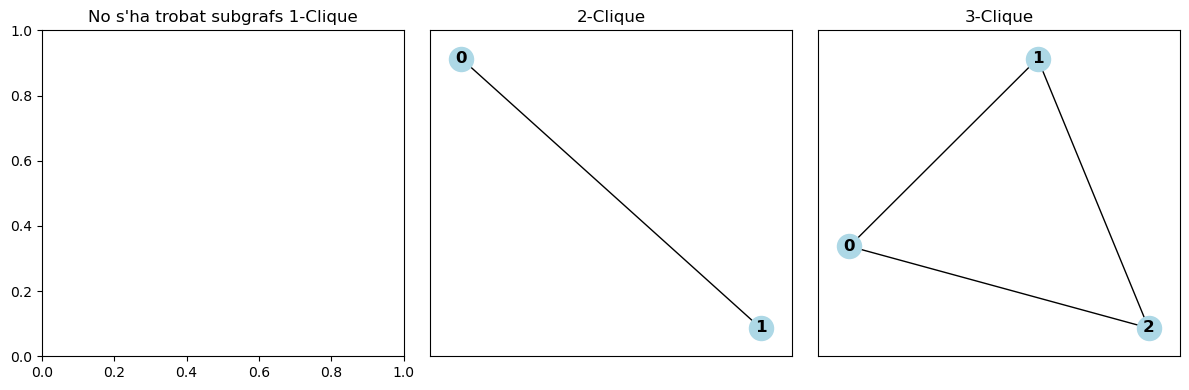

In [19]:
# Busquem un subgraf 1-clique: un node no connectata a cap altre node
one_clique = [node for node in G.nodes() if G.degree(node) == 0][:1]

# Busquem un subgraf 2-clique: dos nodes connectats entre ells
two_clique = None
# per cada parella de nodes mirem si hi ha aresta entre ells
for u, v in itertools.combinations(G.nodes(), 2):
    if G.has_edge(u, v):
        two_clique = [u, v]
        break

# Busquem un subgraf 3-clique: tres nodes connectats entre ells
three_clique = None
# per cada tripleta de nodes mirem si hi ha arestes entre els tres
for triplet in itertools.combinations(G.nodes(), 3):
    if G.has_edge(triplet[0], triplet[1]) and G.has_edge(triplet[1], triplet[2]) and G.has_edge(triplet[0], triplet[2]):
        three_clique = list(triplet)
        break

# Imprimim els nodes que formen les cliques
print("1-Clique node:", one_clique)
print("2-Clique nodes:", two_clique)
print("3-Clique nodes:", three_clique)

# Creem subgrafs per cada clique
one_clique_subgraph = G.subgraph(one_clique)
two_clique_subgraph = G.subgraph(two_clique)
three_clique_subgraph = G.subgraph(three_clique)

# Dibuixem cada subgraf
plt.figure(figsize=(12, 4))

plt.subplot(131)
if one_clique_subgraph:
    nx.draw_networkx(one_clique_subgraph, nx.spring_layout(one_clique_subgraph), with_labels=True,
                     node_color='lightblue', node_size=300, font_size=12, font_weight='bold')
    plt.title('1-Clique')
else:
    plt.title("No s'ha trobat subgrafs 1-Clique")

plt.subplot(132)
if two_clique_subgraph:
    nx.draw_networkx(two_clique_subgraph, nx.spring_layout(two_clique_subgraph), with_labels=True,
                     node_color='lightblue', node_size=300, font_size=12, font_weight='bold')
    plt.title('2-Clique')
else:
    plt.title("No s'ha trobat subgrafs 2-Clique")

plt.subplot(133)
if three_clique_subgraph:
    nx.draw_networkx(three_clique_subgraph, nx.spring_layout(three_clique_subgraph), with_labels=True,
                     node_color='lightblue', node_size=300, font_size=12, font_weight='bold')
    plt.title('3-Clique')
else:
    plt.title("No s'ha trobat subgrafs 3-Clique")

plt.tight_layout()
plt.show()


Observem que no hi ha 1-clique ja que el graf original és connex. Si un graf és connex, no pot haver-hi 1-cliques, ja que en un graf connex tots els nodes estan connectats d'alguna manera, i una 1-clique està formada per nodes solitaris, sense arestes que els connectin.

## 4. Arbres

Els arbres són un subtipus específic de graf molt estès en ciències de la computació i que s'utilitza àmpliament per representar o emmagatzemar dades. Es recomanen les següents lectures per entendre les particularitats d'un arbre enfront dels grafs generals:

https://es.wikipedia.org/wiki/%C3%81rbol_(teor%C3%ADa_de_grafos)

https://es.wikipedia.org/wiki/%C3%81rbol_(inform%C3%A1tica)

El coneixement de l'estructura d'arbres per emmagatzemar dades i preguntes relacionades amb els algoritmes que es poden implementar per cercar informació en ells són habituals en les entrevistes d'empreses tecnològiques (veure: "Cracking the Coding Interview" o "Introduction to Algorithms").



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 4: Algoritme de cerca en arbres </strong> (1.5 punts)
</div>

* Explica les particularitats que té un graf per ser considerat un arbre.
* Construeix un arbre binari complet de profunditat 4 i representa'l.
* Implementa el pseudocodi BFS de la pàgina 28 d'Introducció als grafs i xarxes i aplica'l sobre l'arbre anterior per recuperar l'ordre dels nodes.



Un arbre és un tipus especial de graf acíclic, és a dir, un graf que no conté cicles. Les particularitats que defineixen un graf com a arbre són:

- Connexió: Un arbre és un graf connex, el que significa que hi ha un camí entre qualsevol parella de nodes. Tots els nodes estan connectats.

- Acíclic: No conté cicles, és a dir, no hi ha cap seqüència de nodes que et porti de tornada a un node ja visitat. Això significa que no es pot començar en un node i tornar al mateix seguint les arestes.

- Únic camí: Hi ha un únic camí entre qualsevol parella de nodes del graf. Això implica que no hi ha bucles ni múltiples camins entre dos nodes.

- N-1 Arestes: Un arbre amb n nodes té exactament n-1 arestes. Això és una propietat fonamental dels arbres i es deriva de ser un graf connex acíclic.

- Sense nodes aïllats: No hi ha nodes aïllats en un arbre. Cada node té almenys una aresta que el connecta amb un altre node

In [20]:
# funcions recollides de la pàgina web 
# https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3/29597209#29597209
# per tal de poder dibuixar un arbre sense necessitat d'importar llibreries gràfiques
    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

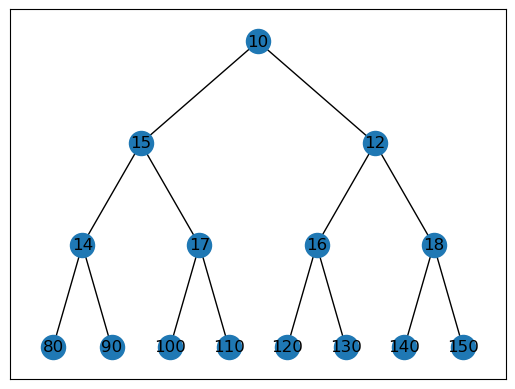

In [21]:
# Creem un gràfic buit
T = nx.Graph()

# Afegim arestes per connectar els nodes
# Posem nombres no consecutius per veure a l'últim apartat com s'ordenen els nodes
T.add_edges_from([(10, 15), (10, 12)])
T.add_edges_from([(15, 14), (15, 17), (12, 16), (12, 18)])
T.add_edges_from([(14, 80), (14, 90), (17, 100), (17, 110), (16, 120), (16, 130), (18, 140), (18, 150)])

# Dibuixem l'arbre
pos = hierarchy_pos(T,10)    
nx.draw_networkx(T, pos=pos, with_labels=True)
plt.show()

In [22]:
# funció BSF per obtenir l'ordre dels nodes
def BFS(T, start_node):
    # Conjunt per mantenir els nodes visitats
    visited = set()
    # Llista per a la cua
    queue = []  
    
    # Afegir el node inicial a la cua
    queue.append(start_node)
    # Marcar el node inicial com a visitat
    visited.add(start_node)

    while queue:
        # Treure el primer element de la cua
        v = queue.pop(0)  

        # Processar el node v (en el nostre cas, simplement imprimir-lo)
        print(v)

        # Per a tots els nodes adjacents de v
        for w in T[v]:
            # Si el node no ha estat visitat
            if w not in visited:  
                # Afegir el node a la cua
                queue.append(w)  
                # Marcar el node com a visitat
                visited.add(w)  

In [23]:
# Node inicial
start_node = 10

# Cridar l'algorisme BFS que imprimirà l'ordre dels nodes
BFS(T, start_node)

10
15
12
14
17
16
18
80
90
100
110
120
130
140
150


## 4. Grafs sintètics

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 5: Graf Gilbert </strong> (1.5 punts)
</div>

Crea una funció que tingui com a entrada un nombre n de nodes i la probabilitat p. I que retorni un graf del tipus Gilbert. Per això, no s'ha d'utilitzar cap funció ja predefinida. Genera dos exemples i comprova guiant-te per la teoria i amb l'ús d'alguna mètrica adequada que el graf generat es correspon amb un Gilbert.

In [24]:
# funció que te com a entrada un nombre n de nodes i la probabilitat p. I que retorna un graf del tipus Gilbert
def Gilbert(n, p):
    G = {}  # Inicialitzem el graf com a un diccionari buit

    # Creem nodes de 0 a n-1
    for i in range(n):
        G[i] = set()

    # Iterem sobre totes les parelles de nodes (i, j)
    for i in range(n):
        for j in range(i + 1, n):
            # Generem una aresta amb probabilitat p
            if random.random() < p:
                G[i].add(j)
                G[j].add(i)

    return G

In [25]:
# Exemple 1
n1 = 1000  # Nombre de nodes
p1 = 0.2  # Probabilitat d'aresta
G1 = Gilbert(n1, p1)

In [26]:
# Exemple 2
n2 = 1000  # Nombre de nodes
p2 = 0.4  # Probabilitat d'aresta
G2 = Gilbert(n2, p2)

Per comprovar si G1 i G2 són grafs de Gilbert, podem analitzar algunes propietats pròpies d'aquests grafs. El model de Gilbert es caracteritza per tenir arestes amb una probabilitat p, independentment de les altres arestes. Algunes mètriques i propietats que podem observar i comparar inclouen:

- Probabilitat de connexió entre parelles de nodes: Podem calcular la probabilitat mitjana que dos nodes estiguin connectats en el graf.

- Distribució de graus: Podem analitzar la distribució de graus dels nodes en el graf. En un graf de Gilbert, aquesta distribució es pot apropar a una distribució binomial.

El següent codi calcularà la probabilitat mitjana d'aresta i mostrarà la distribució de graus per als grafs G1 i G2. Podrem comparar aquestes mètriques amb la probabilitat p que hem utilitzat per generar els grafs Gilbert per veure si coincideixen.

Probabilitat mitjana d'aresta per G1: 0.19978178178178177
Probabilitat mitjana d'aresta per G2: 0.3989209209209209


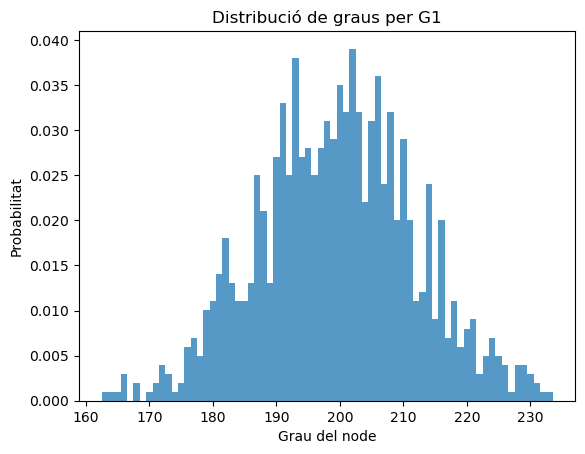

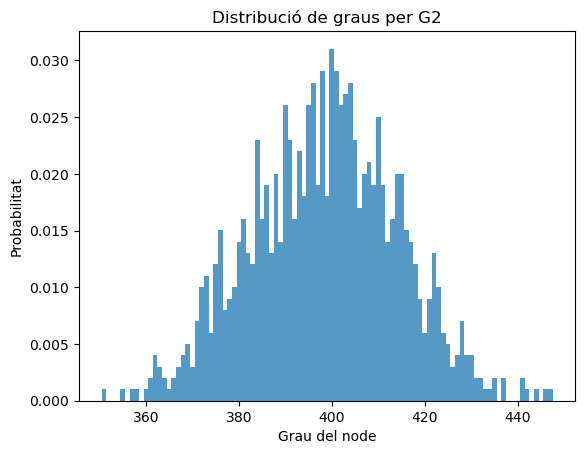

In [27]:
# funció que retorna la probabilitat d'aresta d'un graf
def probability_of_edge(G):
    n = len(G)
    edges_count = sum(len(neighbors) for neighbors in G.values()) // 2
    return edges_count / (n * (n - 1) / 2)

# funció que ploteja la distribució de la probabilitat per grau
def plot_degree_distribution(G, title):
    degrees = [len(neighbors) for neighbors in G.values()]
    plt.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 1) - 0.5, density=True, alpha=0.75)
    plt.xlabel('Grau del node')
    plt.ylabel('Probabilitat')
    plt.title(title)
    plt.show()

# Càlcul de la probabilitat mitjana d'aresta per G1 i G2
p1_calculat = probability_of_edge(G1)
p2_calculat = probability_of_edge(G2)

print("Probabilitat mitjana d'aresta per G1:", p1_calculat)
print("Probabilitat mitjana d'aresta per G2:", p2_calculat)

# Representació de la distribució de probabilitat versus graus
plot_degree_distribution(G1, 'Distribució de graus per G1')
plot_degree_distribution(G2, 'Distribució de graus per G2')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 6: Transició de fase </strong> (1.5 punts)
</div>

A la teoria s'indica que en un graf Gilbert, Erdős-Rényi van demostrar que es produeix en p=1/n una transició de fase on apareix la component gegant. En aquest cas anem a aproximar la teoria considerant que un graf té component gegant si almenys un 10% dels nodes estan connectats entre ells. Es demana per diferents valors de p al voltant de 1/n, calcular la probabilitat que hi hagi una component gegant en grafs de mida n=200. Aquesta probabilitat es pot estimar, generant 100 grafos per cada p i calculant quantes d'ells tenen component gegant. Finalment representar en un gràfic els resultats on l'eix x correspon a p i l'eix y correspon a la probabilitat calculada. Addicionalment dibuixar una línia vertical en p=1/n on la teoria prediu una transició de fase. Nota: Utilitza la funció creada a l'exercici anterior per generar els grafs Gilbert.

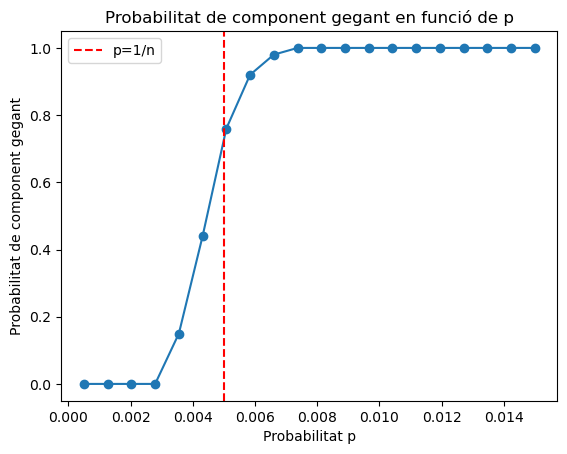

In [28]:
# funció que retorna True si hi ha un compnent gegant (>10% nodes connectats)
def has_giant_component(G):
    # Transforma el diccionari de nodes en un graf no dirigit
    G = nx.Graph(G)
    # Calculem el subgraf més gran (el nombre més gran de components connectats)
    largest_cc = max(nx.connected_components(G), key=len, default=[])
    # retorna si el subgraf més gran és major que el 10% del graf original
    return len(largest_cc) >= 0.1 * len(G)

n = 200  # Nombre de nodes
p_values = np.linspace(0.0005, 0.015, 20)  # Valors de p al voltant de 1/n
num_graphs_per_p = 100  # Nombre de grafs per cada valor de p
probabilities = []  # Llista per emmagatzemar les probabilitats

# per cada valor de probabilitat entre 0.0005 i 0.015
for p in p_values:
    giant_count = 0  # Comptador de grafs amb component gegant
    # generem un graph de Gilbert amb probabilitat p
    for _ in range(num_graphs_per_p):
        Gil = Gilbert(n, p)
        # si el graf té component gengant, augmentem el comptador
        if has_giant_component(Gil):
            giant_count += 1
    
    # calculem la probabilitat de tenir compnent gegant com el nombre de components gegants
    # entre el nombre de grafs creats
    giant_probability = giant_count / num_graphs_per_p
    # adjuntem la probabilitat a la llista per poder plotejar a posteriori
    probabilities.append(giant_probability)

# Representació gràfica
plt.plot(p_values, probabilities, marker='o')
plt.axvline(1/n, color='r', linestyle='--', label='p=1/n')
plt.xlabel('Probabilitat p')
plt.ylabel('Probabilitat de component gegant')
plt.title('Probabilitat de component gegant en funció de p')
plt.legend()
plt.show()

Observem a la gràfica que per probabilitats > a 0.005 (1/200) la probabilitat de component gegant és molt propera al 100%.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Exercici 7: Comparació de grafs sintètics</strong> (1.5 punts)
</div>

Finalment triarem diversos grafs sintètics i els compararem amb el graf original. Per fer-ho, es compararan les mètriques del graf original i les mètriques dels grafs sintètics. Per això es demana tenir en compte les característiques del graf original quan es generin els grafs.

1. Generar un graf aleatori mitjançant el **model Watts–Strogatz**.
2. Generar un graf aleatori a partir de la seqüència de graus del graf original, utilitzant el **model de configuració**.
3. Generar un graf aleatori emprant el model de **distribució de graus esperada**.
4. Calcular les mètriques que es considerin oportunes per determinar el grau de similitud (o disimilitud) entre el graf original i els diferents grafs sintètics.
5. Quin és el model de generació de grafs sintètics que millor ha aconseguit aproximar el graf original? Justificar la resposta emprant valors objectius que donin suport a les argumentacions.



In [29]:
# Funció per calcular les mètriques d'un graf
def calculate_metrics(graph):
    metrics = {}

    # Grau màxim
    metrics['max_degree'] = max(dict(graph.degree()).values())

    # Grau mitjà
    metrics['average_degree'] = np.mean(list(dict(graph.degree()).values()))

    # Centralitat basada en el grau (NDC, degree centrality) del graf
    degree_centrality = nx.degree_centrality(graph)
    metrics['degree_centrality'] = sum(degree_centrality.values()) / len(degree_centrality)

    # Centralitat basada en la intermediació (NBC, betweenness centrality) del graf
    betweenness_centrality = nx.betweenness_centrality(graph)
    metrics['betweenness_centrality'] = sum(betweenness_centrality.values()) / len(betweenness_centrality)

    # Centralitat basada en la proximitat (NCC, closeness centrality) del graf
    closeness_centrality = nx.closeness_centrality(graph)
    metrics['closeness_centrality'] = sum(closeness_centrality.values()) / len(closeness_centrality)

    # Coeficient de clústering mitjà
    metrics['average_clustering'] = nx.average_clustering(graph)

    # Longitud mitjana del camí més curt
    metrics['average_shortest_path_length'] = nx.average_shortest_path_length(graph)

    # Diàmetre
    metrics['diameter'] = nx.diameter(graph)

    # Coeficient d’agrupament global (NC, global clustering coefficient)
    metrics['global_clustering'] = nx.transitivity(graph)

    # Mida de la component gegant
    metrics['giant_component_size'] = len(max(nx.connected_components(graph), key=len))

    return metrics

# funció per printar la difèrència de les mètriques
def print_metric_differences(metrics_original, metrics_synthetic, graf_name):
    print(f"Diferència entre les mètriques del graf original i el graf {graf_name}:")

    for metric_name in metrics_original:
        difference = metrics_synthetic[metric_name] - metrics_original[metric_name]
        percent = ((metrics_synthetic[metric_name] - metrics_original[metric_name])/metrics_synthetic[metric_name])*100
        print(f"Diferència en {metric_name}: {difference} -> {percent:.2f}%")

# Calculem les mètriques originals
original_metrics = calculate_metrics(G)

In [30]:
# Paràmetres del model de Watts-Strogatz
n = G.number_of_nodes()  # Nombre de nodes igual que G
k = 4    # Grau dels nodes inicials (graf regular)
p = 0.1  # Probabilitat de reconnexió aleatòria

# Genera un graf de Watts-Strogatz
G_ws = nx.watts_strogatz_graph(n, k, p)

# Calcula mètriques del graf generat
average_clustering_ws = nx.average_clustering(G_ws)
average_shortest_path_length_ws = nx.average_shortest_path_length(G_ws)

metrics_ws = calculate_metrics(G_ws)

# Mostra les mètriques
print("Mètriques del graf de Watts-Strogatz:")
print("Average clustering coefficient:", average_clustering_ws)
print("Average shortest path length:", average_shortest_path_length_ws,"\n")
print_metric_differences(original_metrics, metrics_ws, 'Watts-Strogatz')

Mètriques del graf de Watts-Strogatz:
Average clustering coefficient: 0.36611789697291547
Average shortest path length: 8.763012016944757 

Diferència entre les mètriques del graf original i el graf Watts-Strogatz:
Diferència en max_degree: -737 -> -10528.57%
Diferència en average_degree: -164.79368029739777 -> -4119.84%
Diferència en degree_centrality: -0.15329644678827659 -> -4119.84%
Diferència en betweenness_centrality: 0.006426207027344054 -> 88.91%
Diferència en closeness_centrality: -0.42605390657010644 -> -370.84%
Diferència en average_clustering: -0.22451079293602344 -> -61.32%
Diferència en average_shortest_path_length: 6.901746347367511 -> 78.76%
Diferència en diameter: 14 -> 77.78%
Diferència en global_clustering: -0.05172557404919492 -> -14.86%
Diferència en giant_component_size: 0 -> 0.00%


In [31]:
# Obté la seqüència de graus del graf original
degree_sequence = [d for n, d in G.degree()]

# Genera un graf aleatori amb la mateixa seqüència de graus
G_config = nx.configuration_model(degree_sequence)

# Elimina les autoarcs i arestes múltiples (graf simple)
G_config = nx.Graph(G_config)

# Calcula mètriques del graf generat
average_clustering_config = nx.average_clustering(G_config)
average_shortest_path_length_config = nx.average_shortest_path_length(G_config)

metrics_config = calculate_metrics(G_config)

# Mostra les mètriques
print("Mètriques del graf generat amb el model de configuració:")
print("Average clustering coefficient:", average_clustering_config)
print("Average shortest path length:", average_shortest_path_length_config,"\n")
print_metric_differences(original_metrics, metrics_config, 'utilitzant el model de configuració')

Mètriques del graf generat amb el model de configuració:
Average clustering coefficient: 0.27201046562361214
Average shortest path length: 1.8851975447393448 

Diferència entre les mètriques del graf original i el graf utilitzant el model de configuració:
Diferència en max_degree: -259 -> -53.40%
Diferència en average_degree: -27.455390334572485 -> -19.43%
Diferència en degree_centrality: -0.025539897985648485 -> -19.43%
Diferència en betweenness_centrality: 2.2282937767318864e-05 -> 2.70%
Diferència en closeness_centrality: -0.00850828607323817 -> -1.60%
Diferència en average_clustering: -0.31861822428532677 -> -117.13%
Diferència en average_shortest_path_length: 0.02393187516209916 -> 1.27%
Diferència en diameter: 0 -> 0.00%
Diferència en global_clustering: -0.14631489158407746 -> -57.72%
Diferència en giant_component_size: 0 -> 0.00%


In [32]:
# Creem un graf buit amb el mateix nombre de nodes
G_random = nx.Graph()

# Assignem graus aleatoris als nodes
G_random.add_nodes_from(range(len(degree_sequence)))

# Creem les arestes mantenint la seqüència de graus
for i, degree in enumerate(degree_sequence):
    nodes = list(G_random.nodes())
    np.random.shuffle(nodes)
    nodes = nodes[:degree]
    G_random.add_edges_from([(i, node) for node in nodes if i != node])

# Calcula mètriques del graf aleatori
average_clustering_random = nx.average_clustering(G_random)
average_shortest_path_length_random = nx.average_shortest_path_length(G_random)

metrics_random = calculate_metrics(G_random)

# Mostra les mètriques
print("Mètriques del graf aleatori amb distribució de graus esperada:")
print("Average clustering coefficient:", average_clustering_random)
print("Average shortest path length:", average_shortest_path_length_random,"\n")
print_metric_differences(original_metrics, metrics_random, 'emprant el model de distribució de graus esperada')

Mètriques del graf aleatori amb distribució de graus esperada:
Average clustering coefficient: 0.37110466979170376
Average shortest path length: 1.7107149649865998 

Diferència entre les mètriques del graf original i el graf emprant el model de distribució de graus esperada:
Diferència en max_degree: 44 -> 5.58%
Diferència en average_degree: 142.18773234200745 -> 45.72%
Diferència en degree_centrality: 0.13226765799256546 -> 45.72%
Diferència en betweenness_centrality: -0.00014017756479576052 -> -21.18%
Diferència en closeness_centrality: 0.046035129893706284 -> 7.84%
Diferència en average_clustering: -0.21952402011723515 -> -59.15%
Diferència en average_shortest_path_length: -0.1505507045906458 -> -8.80%
Diferència en diameter: -2 -> -100.00%
Diferència en global_clustering: -0.05016373215688735 -> -14.35%
Diferència en giant_component_size: 0 -> 0.00%


Els resultats mostren les diferències entre les mètriques del graf original i els grafs sintètics generats mitjançant diferents models de generació de grafs: Watts-Strogatz, model de configuració i model de distribució de graus esperada. Veiem les principals diferències i com s'han apropat als grafs originals:

**Model Watts-Strogatz:**

- Diferències negatives significatives en mètriques com el grau màxim, el grau mitjà, la centralitat de grau i el coeficient de clustering. Això indica que aquest model ha reduït dràsticament aquestes mètriques respecte al graf original.
- A més, les diferències positives en mètriques com la intermediació i la longitud mitjana del camí més curt indiquen que aquest model ha incrementat aquestes mètriques.
- El graf generat amb aquest model és notablement diferent del graf original en termes de mètriques.

**Model de Configuració:**

- Aquest model aconsegueix reduir les diferències en mètriques com el grau màxim, el grau mitjà i la centralitat de grau, tot i que encara hi ha diferències negatives, sobretot en el coeficient de clustering.
- El graf generat amb aquest model és més semblant al graf original en termes de mètriques, però encara hi ha diferències significatives en mètriques com el coeficient de clustering mitjà.

**Model de Distribució de Graus Esperada:**

- Aquest model aconsegueix disminuir les diferències en mètriques com el grau màxim, el grau mitjà i la centralitat de grau, i fins i tot obtenir diferències positives en aquestes mètriques.
- Aquest model mostra una aproximació més precisa a les mètriques del graf original, i les diferències negatives es redueixen significativament en comparació amb els altres models.

En general, basant-se en les diferències mostrades, sembla que el **model de distribució de graus esperada** és el que millor s'aproxima al graf original en termes de mètriques. Tot i que encara hi ha diferències en algunes mètriques, aquestes són més petites en comparació amb els altres models.